In [1]:
#Observations/inferences from data analysis

#Capomulin and Ramicane had more data points in the study than the other drug regimens
#For mice treated with Capomulin, there is a positive correlation between the weight of the mice and the average tumor volume
#The median of final tumor volume for Capomulin and Ramicane (approximately 46 (mm3)) was lower than the median of final tumor volume for Infubinol or Ceftamin (approximately 60 (mm3))
#The final tumor volume interquartile range for Capomulin (2 mm3) and Ramicane (1 mm3) was much smaller than the interquartile range for Infubinol (11 mm3) or Ceftamin (16 mm3)


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


regimen_df = mouse_data_complete_df.groupby(['Drug Regimen'])
tumor_df = regimen_df.mean()

regimen_tumorvolume_median = regimen_df["Tumor Volume (mm3)"].median()
regimen_tumorvolume_var = regimen_df["Tumor Volume (mm3)"].var()
regimen_tumorvolume_stdev = regimen_df["Tumor Volume (mm3)"].std()
regimen_tumorvolume_sem = regimen_df["Tumor Volume (mm3)"].sem()

regimen_tumorvolume_summary_df = tumor_df.drop(["Age_months", "Timepoint", "Weight (g)", "Metastatic Sites"], axis = 1)

regimen_tumorvolume_summary_df["Tumor Volume Median"] = regimen_tumorvolume_median
regimen_tumorvolume_summary_df["Tumor Volume Variance"] = regimen_tumorvolume_var
regimen_tumorvolume_summary_df["Tumor Volume Standard Deviation"] = regimen_tumorvolume_stdev
regimen_tumorvolume_summary_df["Tumor Volume SEM"] = regimen_tumorvolume_sem

regimen_tumorvolume_summary_df.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume Mean"}, inplace=True)

regimen_tumorvolume_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


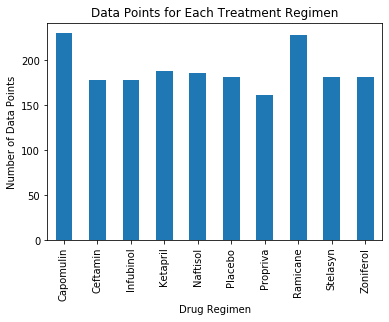

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

timepoint = regimen_df ["Timepoint"].count()
timepoint.plot.bar()
plt.title('Data Points for Each Treatment Regimen')
plt.ylabel('Number of Data Points')
plt.show()


Text(0, 0.5, 'Number of Datapoints')

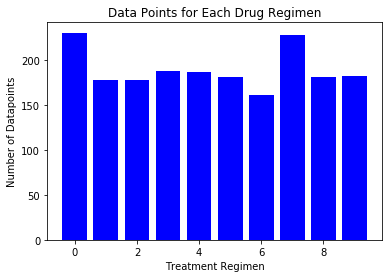

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen = regimen_df["Drug Regimen"].unique()
datapoints = regimen_df["Mouse ID"].count()
x_axis = np.arange(len(datapoints))
plt.bar(x_axis, datapoints, color="b", align="center")
plt.title("Data Points for Each Drug Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Datapoints")


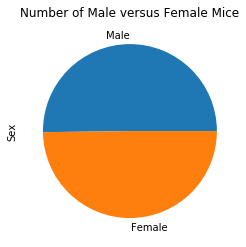

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_data_complete_df.head()

mouseid_df = mouse_data_complete_df.groupby(["Mouse ID"])
mouseid_df.first()
mouse_df = mouseid_df.first()
gender = mouse_df["Sex"].value_counts()
gender.plot.pie()
plt.title('Number of Male versus Female Mice')
plt.show()




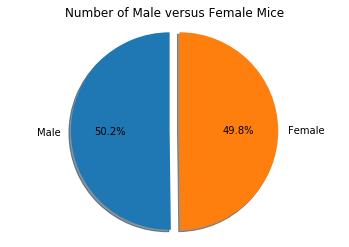

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Male', 'Female'
sizes = [125, 124]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Number of Male versus Female Mice')

plt.show()

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

greatesttimepoint = mouse_data_complete_df.groupby(["Mouse ID"])
timepoint = greatesttimepoint.max()
timepoint

#CAPOMULIN

capomulin = timepoint.loc[timepoint["Drug Regimen"] == "Capomulin", :]
capomulintumorvolume = capomulin["Tumor Volume (mm3)"]
capomulintumorvolume

capquartiles = capomulintumorvolume.quantile([.25,.5,.75])
caplowerq = capquartiles[0.25]
capupperq = capquartiles[0.75]
capiqr = capupperq-caplowerq

print(f"The lower quartile of final tumor volume for mice treated with Capomulin is: {caplowerq}")
print(f"The upper quartile of final tumor volume for mice treated with Capomulin is: {capupperq}")
print(f"The interquartile range of final tumor volume for mice treated with Capomulin is: {capiqr}")
print(f"The median of final tumor volume for mice treated with Capomulin is: {capquartiles[0.5]} ")

caplower_bound = caplowerq - (1.5*capiqr)
capupper_bound = capupperq + (1.5*capiqr)
print(f"Values below {caplower_bound} could be outliers.")
print(f"Values above {capupper_bound} could be outliers.")
print('\n')

#RAMICANE

ramicane = timepoint.loc[timepoint["Drug Regimen"] == "Ramicane", :]
ramicanetumorvolume = ramicane["Tumor Volume (mm3)"]
ramicanetumorvolume

ramquartiles = ramicanetumorvolume.quantile([.25,.5,.75])
ramlowerq = ramquartiles[0.25]
ramupperq = ramquartiles[0.75]
ramiqr = ramupperq-ramlowerq

print(f"The lower quartile of final tumor volume for mice treated with Ramicane is: {ramlowerq}")
print(f"The upper quartile of final tumor volume for mice treated with Ramicane is: {ramupperq}")
print(f"The interquartile range of final tumor volume for mice treated with Ramicane is: {ramiqr}")
print(f"The median of final tumor volume for mice treated with Ramicane is: {ramquartiles[0.5]} ")

ramlower_bound = ramlowerq - (1.5*ramiqr)
ramupper_bound = ramupperq + (1.5*ramiqr)
print(f"Values below {ramlower_bound} could be outliers.")
print(f"Values above {ramupper_bound} could be outliers.")
print('\n')


#Infubinol

infubinol = timepoint.loc[timepoint["Drug Regimen"] == "Infubinol", :]
infubinoltumorvolume = infubinol["Tumor Volume (mm3)"]
infubinoltumorvolume

infquartiles = infubinoltumorvolume.quantile([.25,.5,.75])
inflowerq = infquartiles[0.25]
infupperq = infquartiles[0.75]
infiqr = infupperq-inflowerq

print(f"The lower quartile of final tumor volume for mice treated with Infubinol is: {inflowerq}")
print(f"The upper quartile of final tumor volume for mice treated with Infubinol is: {infupperq}")
print(f"The interquartile range of final tumor volume for mice treated with Infubinol is: {infiqr}")
print(f"The median of final tumor volume for mice treated with Infubinol is: {infquartiles[0.5]} ")

inflower_bound = inflowerq - (1.5*infiqr)
infupper_bound = infupperq + (1.5*infiqr)
print(f"Values below {inflower_bound} could be outliers.")
print(f"Values above {infupper_bound} could be outliers.")
print('\n')



#Ceftamin

ceftamin = timepoint.loc[timepoint["Drug Regimen"] == "Ceftamin", :]
ceftamintumorvolume = ceftamin["Tumor Volume (mm3)"]
ceftamintumorvolume

cefquartiles = ceftamintumorvolume.quantile([.25,.5,.75])
ceflowerq = cefquartiles[0.25]
cefupperq = cefquartiles[0.75]
cefiqr = cefupperq-ceflowerq

print(f"The lower quartile of final tumor volume for mice treated with Ceftamin is: {ceflowerq}")
print(f"The upper quartile of final tumor volume for mice treated with Ceftamin is: {cefupperq}")
print(f"The interquartile range of final tumor volume for mice treated with Ceftamin is: {cefiqr}")
print(f"The median of final tumor volume for mice treated with Ceftamin is: {cefquartiles[0.5]} ")

ceflower_bound = ceflowerq - (1.5*cefiqr)
cefupper_bound = cefupperq + (1.5*cefiqr)
print(f"Values below {ceflower_bound} could be outliers.")
print(f"Values above {cefupper_bound} could be outliers.")

The lower quartile of final tumor volume for mice treated with Capomulin is: 45.0
The upper quartile of final tumor volume for mice treated with Capomulin is: 46.74900552
The interquartile range of final tumor volume for mice treated with Capomulin is: 1.7490055199999972
The median of final tumor volume for mice treated with Capomulin is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


The lower quartile of final tumor volume for mice treated with Ramicane is: 45.0
The upper quartile of final tumor volume for mice treated with Ramicane is: 46.34383237
The interquartile range of final tumor volume for mice treated with Ramicane is: 1.3438323700000012
The median of final tumor volume for mice treated with Ramicane is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


The lower quartile of final tumor volume for mice treated with Infubinol is: 54.04860769
The upper qu

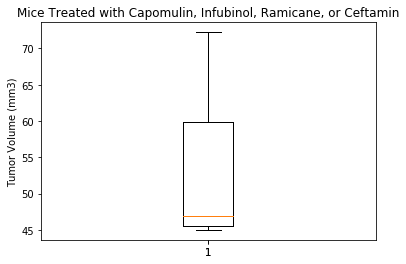

In [9]:
#Boxplot with 4 drug regimens of interest combined

timedrug = timepoint.sort_values("Drug Regimen")
timedrugnew = timedrug.rename(columns={'Drug Regimen': 'Four Regimens of Interest'})
#droppingZoniferol
indexNames = timedrugnew[timedrugnew ['Four Regimens of Interest'] == 'Zoniferol'].index
timedrugnew.drop(indexNames, inplace=True)
#dropping Stelasyn
stelindexNames = timedrugnew[timedrugnew ['Four Regimens of Interest'] == 'Stelasyn'].index
timedrugnew.drop(stelindexNames, inplace=True)
#dropping Placebo
placeboindexNames = timedrugnew[timedrugnew ['Four Regimens of Interest'] == 'Placebo'].index
timedrugnew.drop(placeboindexNames, inplace=True)
#dropping Ketapril
ketaindexNames = timedrugnew[timedrugnew ['Four Regimens of Interest'] == 'Ketapril'].index
timedrugnew.drop(ketaindexNames, inplace=True)
#dropping Propriva
proindexNames = timedrugnew[timedrugnew ['Four Regimens of Interest'] == 'Propriva'].index
timedrugnew.drop(proindexNames, inplace=True)
#dropping Naftisol
naftindexNames = timedrugnew[timedrugnew ['Four Regimens of Interest'] == 'Naftisol'].index
timedrugnew.drop(naftindexNames, inplace=True)
timedrugnew

finaltumorvolume = timedrugnew['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Mice Treated with Capomulin, Infubinol, Ramicane, or Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(finaltumorvolume)
green_diamond = dict(markerfacecolor='g', marker='D')

ax1.boxplot(finaltumorvolume, flierprops=green_diamond)
plt.show()

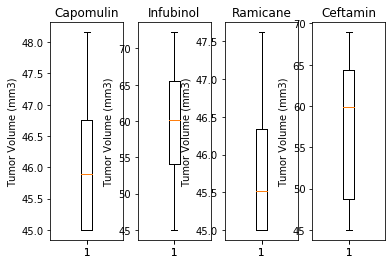

In [10]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

ax1.set_title('Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulintumorvolume)
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(capomulintumorvolume, flierprops=green_diamond)

ax2.set_title('Infubinol')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(infubinoltumorvolume)
green_diamond = dict(markerfacecolor='g', marker='D')
ax2.boxplot(infubinoltumorvolume, flierprops=green_diamond)

ax3.set_title('Ramicane')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(ramicanetumorvolume)
green_diamond = dict(markerfacecolor='g', marker='D')
ax3.boxplot(ramicanetumorvolume, flierprops=green_diamond)

ax4.set_title('Ceftamin')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(ceftamintumorvolume)
green_diamond = dict(markerfacecolor='g', marker='D')
ax4.boxplot(ceftamintumorvolume, flierprops=green_diamond)

plt.show()

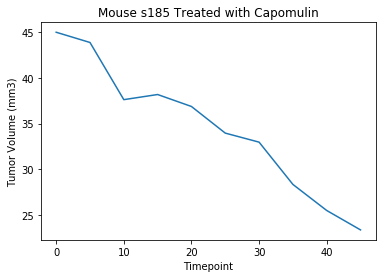

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_data_complete_df.head()
cap = mouse_data_complete_df.loc[mouse_data_complete_df["Drug Regimen"] == "Capomulin", :]
capmouse = cap.loc[cap["Mouse ID"] == "s185", :]
capmouse
x_axis = capmouse["Timepoint"]
y_axis = capmouse["Tumor Volume (mm3)"]
plt.title('Mouse s185 Treated with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)

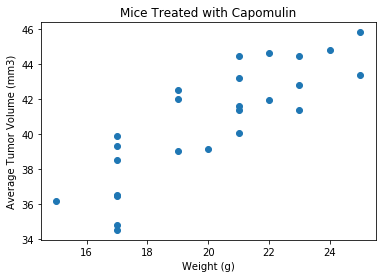

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap = mouse_data_complete_df.loc[mouse_data_complete_df["Drug Regimen"] == "Capomulin", :]
capmouseid =  cap.groupby(["Mouse ID"]).mean()
capmouseid
x_axis = capmouseid["Weight (g)"]
y_axis = capmouseid["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis)
plt.title('Mice Treated with Capomulin')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


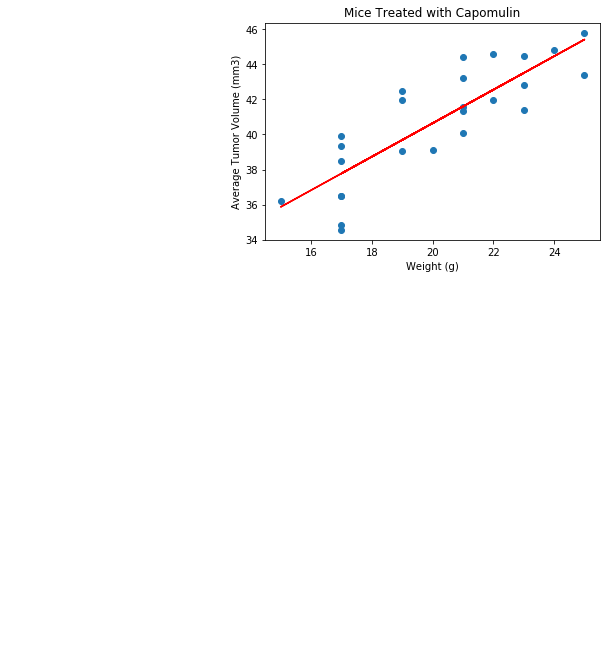

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = x_axis
y_values = y_axis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Mice Treated with Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()